# import

In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
from os import path

In [3]:
import taproc as tp
from taproc.pre_processing import *
from taproc.dataset import *
from taproc.learner import *
from taproc.feature import *

# read file

In [4]:
file_path = Path('/media/zero/dropbox/Dropbox/Data science project/kaggle/home_credit_default_risk/data')

In [5]:
app_train = pd.read_csv(str(file_path/'application_train.csv'))

In [6]:
app_train_proc, y, na_dict = tabular_proc(app_train, y_fld = 'TARGET', max_n_cat=15)

# dataset

In [7]:
dataset = LGBDataset.sklearn_split(app_train_proc, y)

# keep feature

In [8]:
keep_ft = flat_list([['EXT_SOURCE_3'],
 ['EXT_SOURCE_2'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['EXT_SOURCE_1'],
 ['DAYS_BIRTH'],
 ['DAYS_EMPLOYED'],
 ['CODE_GENDER_M'],
 ['NAME_EDUCATION_TYPE_Higher education'],
 ['EXT_SOURCE_1_na'],
 ['DAYS_ID_PUBLISH'],
 ['NAME_FAMILY_STATUS_Married'],
 ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['CODE_GENDER_F'],
 ['NAME_CONTRACT_TYPE_Cash loans'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['AMT_REQ_CREDIT_BUREAU_QRT'],
 ['FLAG_DOCUMENT_3'],
 ['AMT_INCOME_TOTAL'],
 ['REGION_POPULATION_RELATIVE'],
 ['NAME_INCOME_TYPE_Working'],
 ['NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAPARTMENTS_AVG',
  'NONLIVINGAPARTMENTS_MEDI'],
 ['FLAG_WORK_PHONE'],
 ['AMT_REQ_CREDIT_BUREAU_YEAR'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
 ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE']])

In [9]:
dataset.filter_column(keep_ft)

# baseline model

In [10]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':500,
    'learning_rate':0.1,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}

In [11]:
learner = LGBLearner(dataset)

In [12]:
learner.load()

# partial dependence

## tutorial

In [32]:
import pdpbox
from pdpbox import pdp, info_plots, get_dataset #, get_dataset, info_plots

In [33]:
test_otto = get_dataset.otto()
otto_data = test_otto['data']
otto_features = test_otto['features']
otto_model = test_otto['rf_model']
otto_target = test_otto['target']

In [55]:
otto_data['feat_67'].head()

0    7
1    1
2    6
3    5
4    0
Name: feat_67, dtype: int64

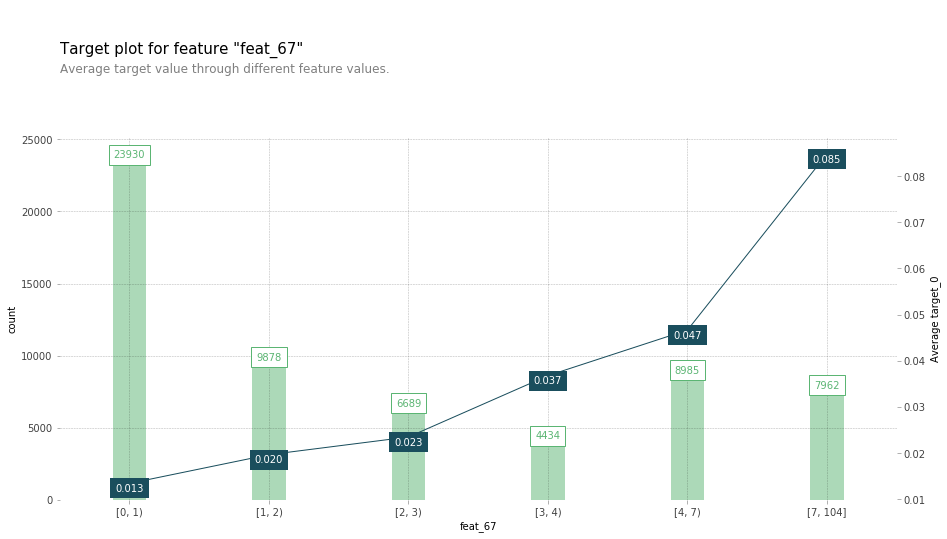

In [51]:
#target_plot
fig, axes, summary_df = info_plots.target_plot(
    df=otto_data, feature='feat_67', feature_name='feat_67', target=otto_target[1]
)

In [52]:
summary_df

,x,display_column,value_lower,value_upper,count,target_0
0,0,"[0, 1)",0.0,1.0,23930,0.013414
1,1,"[1, 2)",1.0,2.0,9878,0.019640
2,2,"[2, 3)",2.0,3.0,6689,0.023471
3,3,"[3, 4)",3.0,4.0,4434,0.036761
4,4,"[4, 7)",4.0,7.0,8985,0.046633
5,5,"[7, 104]",7.0,104.0,7962,0.084778


In [34]:
otto_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,target,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,4,1,0,0,1,6,1,5,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


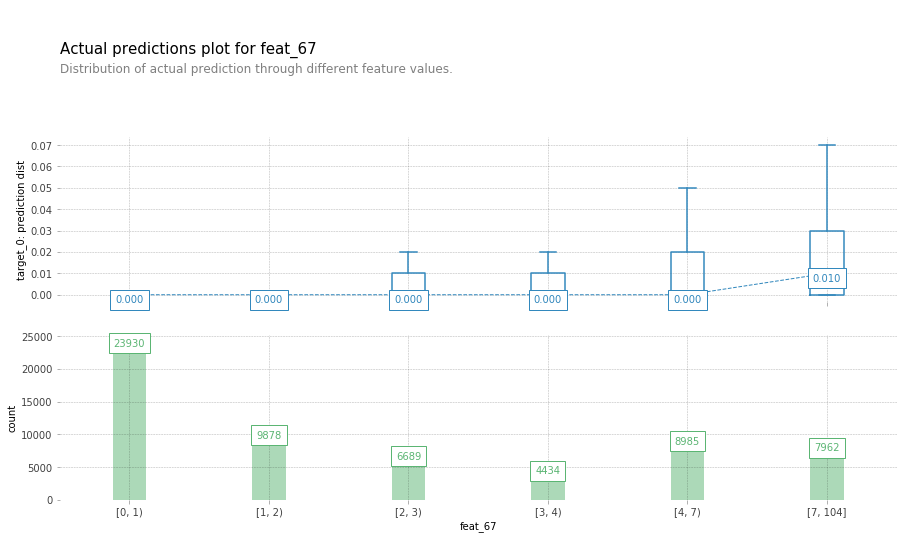

In [58]:
#actual_plot
fig, axes, df = info_plots.actual_plot(
    model=otto_model, X=otto_data[otto_features], feature='feat_67', feature_name='feat_67', 
    which_classes=[0], predict_kwds={}
)

In [59]:
df

,x,display_column,value_lower,value_upper,count,actual_prediction_0_q1,actual_prediction_0_q2,actual_prediction_0_q3
0,0,"[0, 1)",0.0,1.0,23930,0.0,0.00,0.00
1,1,"[1, 2)",1.0,2.0,9878,0.0,0.00,0.00
2,2,"[2, 3)",2.0,3.0,6689,0.0,0.00,0.01
3,3,"[3, 4)",3.0,4.0,4434,0.0,0.00,0.01
4,4,"[4, 7)",4.0,7.0,8985,0.0,0.00,0.02
5,5,"[7, 104]",7.0,104.0,7962,0.0,0.01,0.03


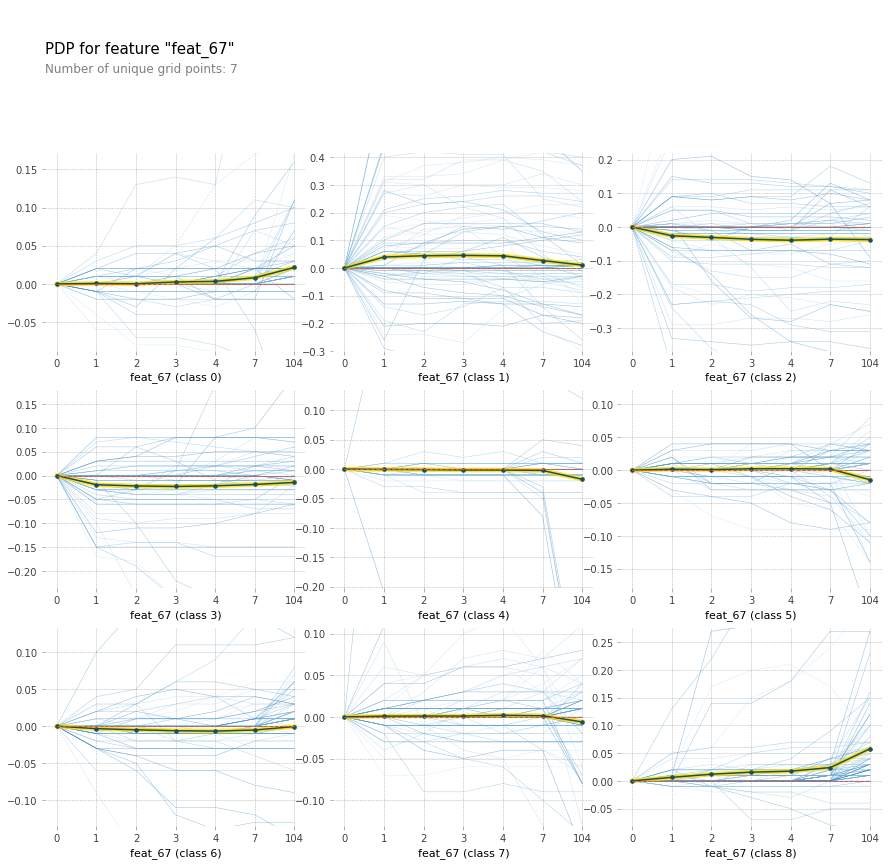

In [51]:
# pdp isolate
pdp_feat_67_rf = pdp.pdp_isolate(
    model=otto_model, dataset=otto_data, model_features=otto_features, feature='feat_67'
)

fig, axes = pdp.pdp_plot(
    pdp_isolate_out=pdp_feat_67_rf, feature_name='feat_67', center=True, x_quantile=True, 
    ncols=3, plot_lines=True, frac_to_plot=100
)

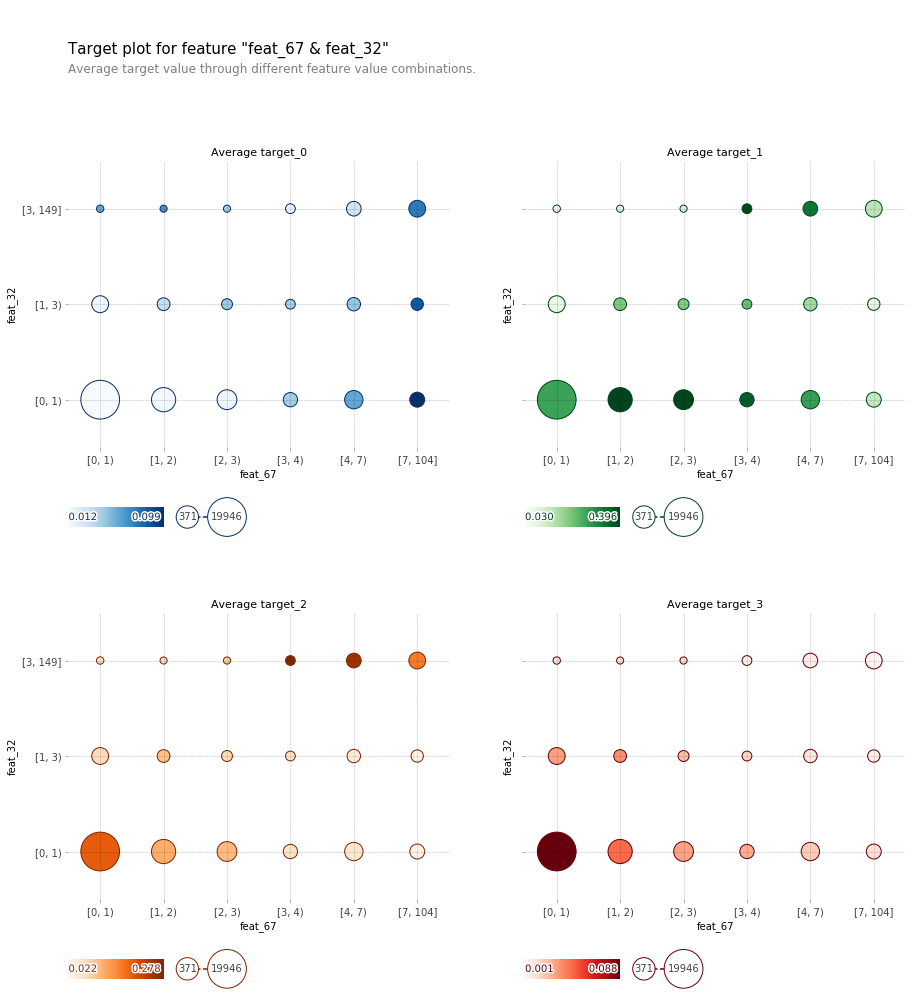

In [57]:
#interaction btw two variable
fig, axes, summary_df = info_plots.target_plot_interact(
    df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
    target=['target_0', 'target_1', 'target_2', 'target_3']
)

## actual

### target distribution through feature CODE_GENDER_M

In [35]:
pdp_df = dataset.lgb_val.data

In [47]:
pdp_df['target'] = dataset.lgb_val.label

In [62]:
import warnings
warnings.filterwarnings("ignore")

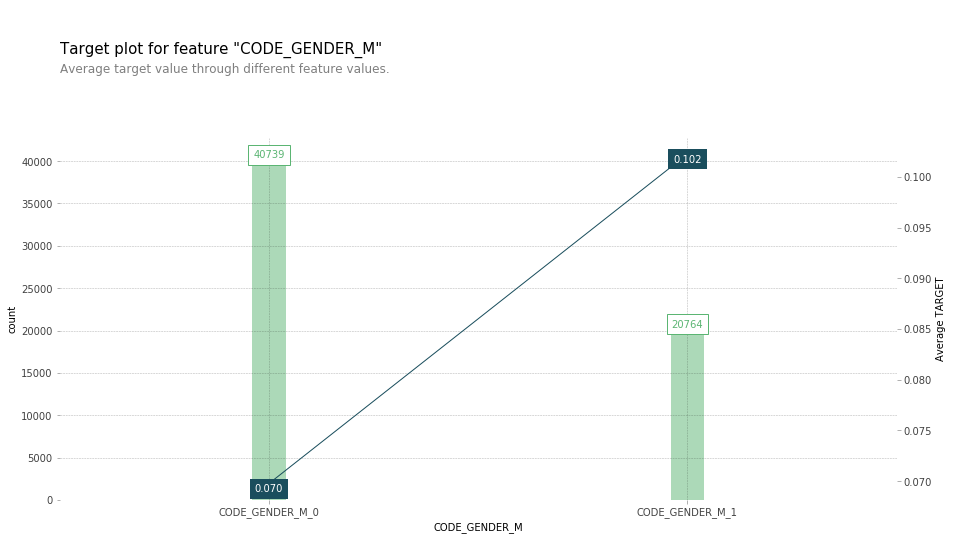

In [63]:
fig, axes, summary_df = info_plots.target_plot(
    #need to seperate target value and df
    df=pdp_df, 
    feature='CODE_GENDER_M', 
    feature_name='CODE_GENDER_M', 
    target='TARGET'
)

_ = axes['bar_ax'].set_xticklabels(summary_df.display_column.values)

In [64]:
summary_df

,x,display_column,count,TARGET
0,0,CODE_GENDER_M_0,40739,0.069761
1,1,CODE_GENDER_M_1,20764,0.102244


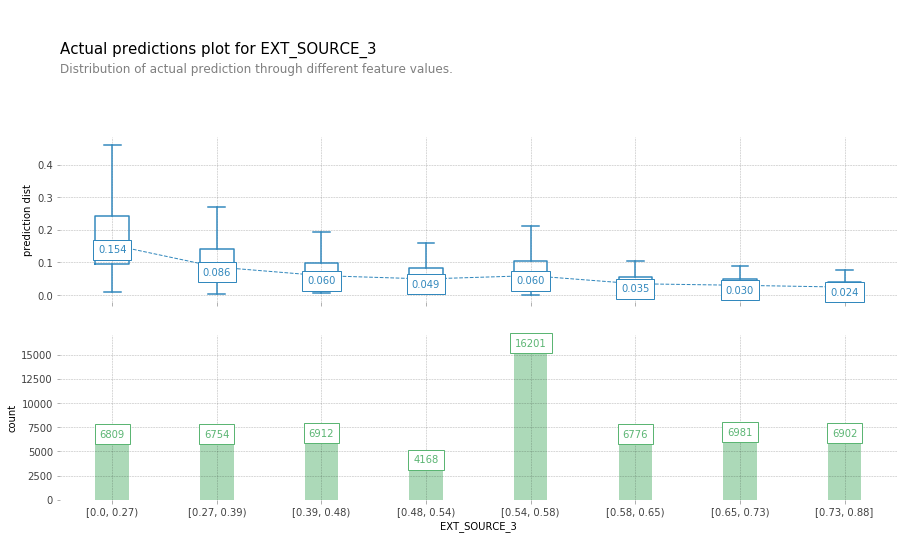

In [49]:
#actual_plot
fig, axes, summary_df = a_plot(
    model=learner, X=pdp_df, feature='EXT_SOURCE_3', feature_name='EXT_SOURCE_3',
    predict_kwds={} #stupid mistake
)

In [50]:
summary_df

,x,display_column,value_lower,value_upper,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,"[0.0, 0.27)",0.000527,0.270707,6809,0.095583,0.153874,0.241342
1,1,"[0.27, 0.39)",0.270707,0.391055,6754,0.051999,0.085930,0.139686
2,2,"[0.39, 0.48)",0.391055,0.484851,6912,0.036668,0.059620,0.099552
3,3,"[0.48, 0.54)",0.484851,0.535276,4168,0.030188,0.049385,0.082368
4,4,"[0.54, 0.58)",0.535276,0.581484,16201,0.033700,0.059554,0.105273
5,5,"[0.58, 0.65)",0.581484,0.652897,6776,0.022001,0.034769,0.055429
6,6,"[0.65, 0.73)",0.652897,0.728141,6981,0.019112,0.029981,0.047777
7,7,"[0.73, 0.88]",0.728141,0.882530,6902,0.015245,0.024428,0.040068


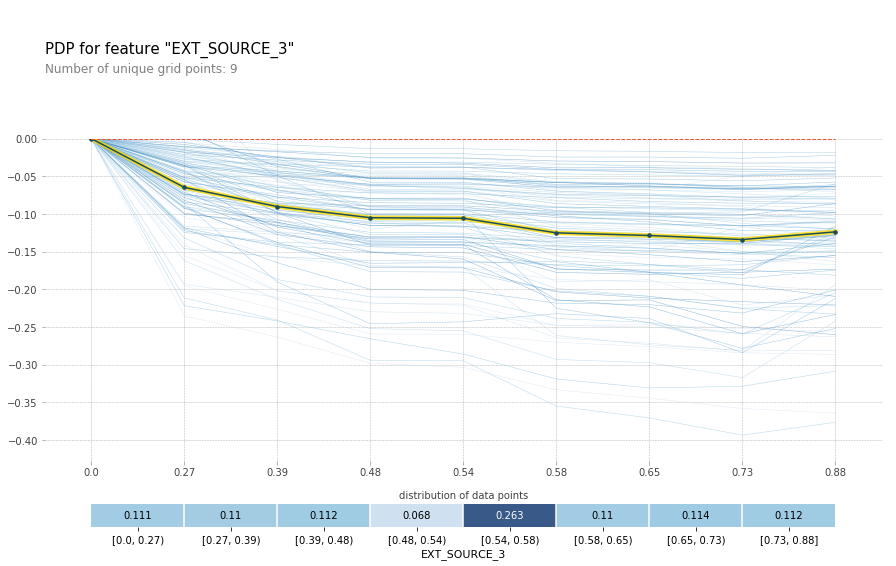

In [55]:
#pdp_isolate

ft_plot = pdp.pdp_isolate(
    model=learner, dataset=pdp_df, model_features = dataset.lgb_trn.data.columns , feature='EXT_SOURCE_3')

fig, axes = pdp.pdp_plot(
    pdp_isolate_out=ft_plot, feature_name='EXT_SOURCE_3', center=True, x_quantile=True, 
    ncols=3, plot_lines=True, frac_to_plot=100, plot_pts_dist=True
)

## to test

In [ ]:
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

def q1(x):
    return x.quantile(0.25)


def q2(x):
    return x.quantile(0.5)


def q3(x):
    return x.quantile(0.75)

In [25]:
def a_plot(model, X, feature, feature_name, num_grid_points=10, grid_type='percentile', percentile_range=None,
                grid_range=None, cust_grid_points=None, show_percentile=False, show_outliers=False, endpoint=True,
                which_classes=None, predict_kwds=None, ncols=2, figsize=None, plot_params=None):
    # check inputs
    n_classes, predict = _check_model(model=model)
    #pdb.set_trace()
    feature_type, show_outliers = _check_info_plot_params(
        df=X, feature=feature, grid_type=grid_type, percentile_range=percentile_range, grid_range=grid_range,
        cust_grid_points=cust_grid_points, show_outliers=show_outliers)

    # make predictions
    # info_df only contains feature value and actual predictions
    prediction = predict(X, **predict_kwds)
    info_df = X[_make_list(feature)]
    actual_prediction_columns = ['actual_prediction']
    if n_classes == 0:
        info_df['actual_prediction'] = prediction
    elif n_classes == 2:
        info_df['actual_prediction'] = prediction[:, 1]
    else:
        plot_classes = range(n_classes)
        if which_classes is not None:
            _check_classes(classes_list=which_classes, n_classes=n_classes)
            plot_classes = sorted(which_classes)

        actual_prediction_columns = []
        for class_idx in plot_classes:
            info_df['actual_prediction_%d' % class_idx] = prediction[:, class_idx]
            actual_prediction_columns.append('actual_prediction_%d' % class_idx)

    info_df_x, bar_data, summary_df, info_cols, display_columns, percentile_columns = _prepare_info_plot_data(
        feature=feature, feature_type=feature_type, data=info_df, num_grid_points=num_grid_points,
        grid_type=grid_type, percentile_range=percentile_range, grid_range=grid_range,
        cust_grid_points=cust_grid_points, show_percentile=show_percentile,
        show_outliers=show_outliers, endpoint=endpoint)

    # prepare data for box lines
    # each box line contains 'x' and actual prediction q1, q2, q3
    box_lines = []
    actual_prediction_columns_qs = []
    for idx in range(len(actual_prediction_columns)):
        box_line = info_df_x.groupby('x', as_index=False).agg(
            {actual_prediction_columns[idx]: [q1, q2, q3]}).sort_values('x', ascending=True)
        box_line.columns = ['_'.join(col) if col[1] != '' else col[0] for col in box_line.columns]
        box_lines.append(box_line)
        actual_prediction_columns_qs += [actual_prediction_columns[idx] + '_%s' % q for q in ['q1', 'q2', 'q3']]
        summary_df = summary_df.merge(box_line, on='x', how='outer').fillna(0)
    summary_df = summary_df[info_cols + ['count'] + actual_prediction_columns_qs]

    fig, axes = _actual_plot(plot_data=info_df_x, bar_data=bar_data, box_lines=box_lines,
                             actual_prediction_columns=actual_prediction_columns, feature_name=feature_name,
                             display_columns=display_columns, percentile_columns=percentile_columns, figsize=figsize,
                             ncols=ncols, plot_params=plot_params)
    return fig, axes, summary_df

In [28]:
def _prepare_info_plot_data(feature, feature_type, data, num_grid_points, grid_type, percentile_range,
                            grid_range, cust_grid_points, show_percentile, show_outliers, endpoint):
    """Prepare data for information plots"""
    prepared_results = _prepare_data_x(
        feature=feature, feature_type=feature_type, data=data, num_grid_points=num_grid_points, grid_type=grid_type,
        percentile_range=percentile_range, grid_range=grid_range, cust_grid_points=cust_grid_points,
        show_percentile=show_percentile, show_outliers=show_outliers, endpoint=endpoint)
    data_x = prepared_results['data']
    display_columns, bound_lows, bound_ups = prepared_results['value_display']
    percentile_columns, percentile_bound_lows, percentile_bound_ups = prepared_results['percentile_display']

    data_x['fake_count'] = 1
    bar_data = data_x.groupby('x', as_index=False).agg({'fake_count': 'count'}).sort_values('x', ascending=True)
    summary_df = pd.DataFrame(np.arange(data_x['x'].min(), data_x['x'].max() + 1), columns=['x'])
    summary_df = summary_df.merge(bar_data.rename(columns={'fake_count': 'count'}), on='x', how='left').fillna(0)

    summary_df['display_column'] = summary_df['x'].apply(lambda x: display_columns[int(x)])
    info_cols = ['x', 'display_column']
    if feature_type == 'numeric':
        summary_df['value_lower'] = summary_df['x'].apply(lambda x: bound_lows[int(x)])
        summary_df['value_upper'] = summary_df['x'].apply(lambda x: bound_ups[int(x)])
        info_cols += ['value_lower', 'value_upper']

    if len(percentile_columns) != 0:
        summary_df['percentile_column'] = summary_df['x'].apply(lambda x: percentile_columns[int(x)])
        summary_df['percentile_lower'] = summary_df['x'].apply(lambda x: percentile_bound_lows[int(x)])
        summary_df['percentile_upper'] = summary_df['x'].apply(lambda x: percentile_bound_ups[int(x)])
        info_cols += ['percentile_column', 'percentile_lower', 'percentile_upper']

    return data_x, bar_data, summary_df, info_cols, display_columns, percentile_columns

In [18]:

import numpy as np
import pandas as pd
import psutil


def _check_feature(feature, df):
    """Make sure feature exists and infer feature type

    Feature types
    -------------
    1. binary
    2. onehot
    3. numeric
    """

    if type(feature) == list:
        if len(feature) < 2:
            raise ValueError('one-hot encoding feature should contain more than 1 element')
        if not set(feature) < set(df.columns.values):
            raise ValueError('feature does not exist: %s' % str(feature))
        feature_type = 'onehot'
    else:
        if feature not in df.columns.values:
            raise ValueError('feature does not exist: %s' % feature)
        if sorted(list(np.unique(df[feature]))) == [0, 1]:
            feature_type = 'binary'
        else:
            feature_type = 'numeric'

    return feature_type


def _check_percentile_range(percentile_range):
    """Make sure percentile range is valid"""
    if percentile_range is not None:
        if type(percentile_range) != tuple:
            raise ValueError('percentile_range: should be a tuple')
        if len(percentile_range) != 2:
            raise ValueError('percentile_range: should contain 2 elements')
        if np.max(percentile_range) > 100 or np.min(percentile_range) < 0:
            raise ValueError('percentile_range: should be between 0 and 100')


def _check_target(target, df):
    """Check and return target type

    target types
    -------------
    1. binary
    2. multi-class
    3. regression
    """

    if type(target) == list:
        if not set(target) < set(df.columns.values):
            raise ValueError('target does not exist: %s' % (str(target)))
        for target_idx in range(len(target)):
            if sorted(list(np.unique(df[target[target_idx]]))) != [0, 1]:
                raise ValueError('multi-class targets should be one-hot encoded: %s' % (str(target[target_idx])))
        target_type = 'multi-class'
    else:
        if target not in df.columns.values:
            raise ValueError('target does not exist: %s' % target)
        if sorted(list(np.unique(df[target]))) == [0, 1]:
            target_type = 'binary'
        else:
            target_type = 'regression'

    return target_type


def _check_dataset(df):
    """Make sure input dataset is pandas DataFrame"""
    if type(df) != pd.core.frame.DataFrame:
        raise ValueError('only accept pandas DataFrame')


def _make_list(x):
    """Make list when it is necessary"""
    if type(x) == list:
        return x
    return [x]


def _expand_default(x, default):
    """Create a list of default values"""
    if x is None:
        return [default] * 2
    return x


def _check_model(model):
    """Check model input, return class information and predict function"""
    try:
        n_classes = len(model.classes_)
        predict = model.predict_proba
    except:
        n_classes = 0
        predict = model.predict

    return n_classes, predict


def _check_grid_type(grid_type):
    """Make sure grid type is percentile or equal"""
    if grid_type not in ['percentile', 'equal']:
        raise ValueError('grid_type should be "percentile" or "equal".')


def _check_classes(classes_list, n_classes):
    """Makre sure classes list is valid

    Notes
    -----
    class index starts from 0

    """
    if len(classes_list) > 0 and n_classes > 2:
        if np.min(classes_list) < 0:
            raise ValueError('class index should be >= 0.')
        if np.max(classes_list) > n_classes - 1:
            raise ValueError('class index should be < n_classes.')


def _check_memory_limit(memory_limit):
    """Make sure memory limit is between 0 and 1"""
    if memory_limit <= 0 or memory_limit >= 1:
        raise ValueError('memory_limit: should be (0, 1)')


def _check_frac_to_plot(frac_to_plot):
    """Make sure frac_to_plot is between 0 and 1 if it is float"""
    if type(frac_to_plot) == float:
        if (frac_to_plot <= 0.0) or (frac_to_plot > 1.0):
            raise ValueError('frac_to_plot: should in range(0, 1) when it is a float')
    elif type(frac_to_plot) == int:
        if frac_to_plot <= 0:
            raise ValueError('frac_to_plot: should be larger than 0.')
    else:
        raise ValueError('frac_to_plot: should be float or integer')


def _plot_title(title, subtitle, title_ax, plot_params):
    """Add plot title."""

    title_params = {'fontname': plot_params.get('font_family', 'Arial'), 'x': 0, 'va': 'top', 'ha': 'left'}
    title_fontsize = plot_params.get('title_fontsize', 15)
    subtitle_fontsize = plot_params.get('subtitle_fontsize', 12)

    title_ax.set_facecolor('white')
    title_ax.text(y=0.7, s=title, fontsize=title_fontsize, **title_params)
    title_ax.text(y=0.5, s=subtitle, fontsize=subtitle_fontsize, color='grey', **title_params)
    title_ax.axis('off')


def _calc_memory_usage(df, total_units, n_jobs, memory_limit):
    """Calculate n_jobs to use"""
    unit_memory = df.memory_usage(deep=True).sum()
    free_memory = psutil.virtual_memory()[1] * memory_limit
    num_units = int(np.floor(free_memory / unit_memory))
    true_n_jobs = np.min([num_units, n_jobs, total_units])
    if true_n_jobs < 1:
        true_n_jobs = 1

    return true_n_jobs


def _axes_modify(font_family, ax, top=False, right=False, grid=False):
    """Modify matplotlib Axes

    Parameters
    ----------
    top: bool, default=False
        xticks location=top
    right: bool, default=False
        yticks, location=right
    grid: bool, default=False
        whether it is for grid plot
    """

    ax.set_facecolor('white')
    ax.tick_params(axis='both', which='major', labelsize=10, labelcolor='#424242', colors='#9E9E9E')

    for tick in ax.get_xticklabels():
        tick.set_fontname(font_family)
    for tick in ax.get_yticklabels():
        tick.set_fontname(font_family)

    ax.set_frame_on(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    if top:
        ax.get_xaxis().tick_top()
    if right:
        ax.get_yaxis().tick_right()
    if not grid:
        ax.grid(True, 'major', 'x', ls='--', lw=.5, c='k', alpha=.3)
        ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)


def _modify_legend_ax(ax, font_family):
    """Modify legend like Axes"""
    ax.set_frame_on(False)

    for tick in ax.get_xticklabels():
        tick.set_fontname(font_family)
    for tick in ax.get_yticklabels():
        tick.set_fontname(font_family)

    ax.set_facecolor('white')
    ax.set_xticks([])
    ax.set_yticks([])


def _get_grids(feature_values, num_grid_points, grid_type, percentile_range, grid_range):
    """Calculate grid points for numeric feature

    Returns
    -------
    feature_grids: 1d-array
        calculated grid points
    percentile_info: 1d-array or []
        percentile information for feature_grids
        exists when grid_type='percentile'
    """

    if grid_type == 'percentile':
        # grid points are calculated based on percentile in unique level
        # thus the final number of grid points might be smaller than num_grid_points
        start, end = 0, 100
        if percentile_range is not None:
            start, end = np.min(percentile_range), np.max(percentile_range)

        percentile_grids = np.linspace(start=start, stop=end, num=num_grid_points)
        value_grids = np.percentile(feature_values, percentile_grids)

        grids_df = pd.DataFrame()
        grids_df['percentile_grids'] = [round(v, 2) for v in percentile_grids]
        grids_df['value_grids'] = value_grids
        grids_df = grids_df.groupby(['value_grids'], as_index=False).agg(
            {'percentile_grids': lambda v: str(tuple(v)).replace(',)', ')')}).sort_values('value_grids', ascending=True)

        feature_grids, percentile_info = grids_df['value_grids'].values, grids_df['percentile_grids'].values
    else:
        if grid_range is not None:
            value_grids = np.linspace(np.min(grid_range), np.max(grid_range), num_grid_points)
        else:
            value_grids = np.linspace(np.min(feature_values), np.max(feature_values), num_grid_points)
        feature_grids, percentile_info = value_grids, []

    return feature_grids, percentile_info


def _get_grid_combos(feature_grids, feature_types):
    """Calculate grid combinations of two grid lists"""

    # create grid combination
    grids1, grids2 = feature_grids
    if feature_types[0] == 'onehot':
        grids1 = np.eye(len(grids1)).astype(int).tolist()
    if feature_types[1] == 'onehot':
        grids2 = np.eye(len(grids2)).astype(int).tolist()

    grid_combos = []
    for g1 in grids1:
        for g2 in grids2:
            grid_combos.append(_make_list(g1) + _make_list(g2))

    return np.array(grid_combos)


def _sample_data(ice_lines, frac_to_plot):
    """Get sample ice lines to plot

    Notes
    -----
    If frac_to_plot==1, will plot all lines instead of sampling one line

    """

    if frac_to_plot < 1.:
        ice_plot_data = ice_lines.sample(int(ice_lines.shape[0] * frac_to_plot))
    elif frac_to_plot > 1:
        ice_plot_data = ice_lines.sample(frac_to_plot)
    else:
        ice_plot_data = ice_lines.copy()

    ice_plot_data = ice_plot_data.reset_index(drop=True)
    return ice_plot_data


def _find_onehot_actual(x):
    """Map one-hot value to one-hot name"""
    try:
        value = list(x).index(1)
    except:
        value = np.nan
    return value


def _find_bucket(x, feature_grids, endpoint):
    """Find bucket that x falls in"""
    # map value into value bucket
    if x < feature_grids[0]:
        bucket = 0
    else:
        if endpoint:
            if x > feature_grids[-1]:
                bucket = len(feature_grids)
            else:
                bucket = len(feature_grids) - 1
                for i in range(len(feature_grids) - 2):
                    if feature_grids[i] <= x < feature_grids[i + 1]:
                        bucket = i + 1
        else:
            if x >= feature_grids[-1]:
                bucket = len(feature_grids)
            else:
                bucket = len(feature_grids) - 1
                for i in range(len(feature_grids) - 2):
                    if feature_grids[i] <= x < feature_grids[i + 1]:
                        bucket = i + 1
    return bucket


def _get_string(x):
    if int(x) == x:
        x_str = str(int(x))
    elif round(x, 1) == x:
        x_str = str(round(x, 1))
    else:
        x_str = str(round(x, 2))

    return x_str


def _make_bucket_column_names(feature_grids, endpoint):
    """Create bucket names based on feature grids"""
    # create bucket names
    column_names = []
    bound_lows = [np.nan]
    bound_ups = [feature_grids[0]]

    feature_grids_str = []
    for g in feature_grids:
        feature_grids_str.append(_get_string(x=g))

    # number of buckets: len(feature_grids_str) - 1
    for i in range(len(feature_grids_str) - 1):
        column_name = '[%s, %s)' % (feature_grids_str[i], feature_grids_str[i + 1])
        bound_lows.append(feature_grids[i])
        bound_ups.append(feature_grids[i + 1])

        if (i == len(feature_grids_str) - 2) and endpoint:
            column_name = '[%s, %s]' % (feature_grids_str[i], feature_grids_str[i + 1])

        column_names.append(column_name)

    if endpoint:
        column_names = ['< %s' % feature_grids_str[0]] + column_names + ['> %s' % feature_grids_str[-1]]
    else:
        column_names = ['< %s' % feature_grids_str[0]] + column_names + ['>= %s' % feature_grids_str[-1]]

    bound_lows.append(feature_grids[-1])
    bound_ups.append(np.nan)

    return column_names, bound_lows, bound_ups


def _make_bucket_column_names_percentile(percentile_info, endpoint):
    """Create bucket names based on percentile info"""
    # create percentile bucket names
    percentile_column_names = []
    percentile_info_numeric = []
    for p_idx, p in enumerate(percentile_info):
        p_array = np.array(p.replace('(', '').replace(')', '').split(', ')).astype(np.float64)
        if p_idx == 0 or p_idx == len(percentile_info) - 1:
            p_numeric = np.min(p_array)
        else:
            p_numeric = np.max(p_array)
        percentile_info_numeric.append(p_numeric)

    percentile_bound_lows = [0]
    percentile_bound_ups = [percentile_info_numeric[0]]

    for i in range(len(percentile_info) - 1):
        # for each grid point, percentile information is in tuple format
        # (percentile1, percentile2, ...)
        # some grid points would belong to multiple percentiles
        low, high = percentile_info_numeric[i], percentile_info_numeric[i + 1]
        low_str, high_str = _get_string(x=low), _get_string(x=high)

        percentile_column_name = '[%s, %s)' % (low_str, high_str)
        percentile_bound_lows.append(low)
        percentile_bound_ups.append(high)

        if i == len(percentile_info) - 2:
            if endpoint:
                percentile_column_name = '[%s, %s]' % (low_str, high_str)
            else:
                percentile_column_name = '[%s, %s)' % (low_str, high_str)

        percentile_column_names.append(percentile_column_name)

    low, high = percentile_info_numeric[0], percentile_info_numeric[-1]
    low_str, high_str = _get_string(x=low), _get_string(x=high)

    if endpoint:
        percentile_column_names = ['< %s' % low_str] + percentile_column_names + ['> %s' % high_str]
    else:
        percentile_column_names = ['< %s' % low_str] + percentile_column_names + ['>= %s' % high_str]
    percentile_bound_lows.append(high)
    percentile_bound_ups.append(100)

    return percentile_column_names, percentile_bound_lows, percentile_bound_ups


def _calc_figsize(num_charts, ncols, title_height, unit_figsize):
    """Calculate figure size"""
    if num_charts > 1:
        nrows = int(np.ceil(num_charts * 1.0 / ncols))
        ncols = np.min([num_charts, ncols])
        width = np.min([unit_figsize[0] * ncols, 15])
        height = np.min([width * 1.0 / ncols, unit_figsize[1]]) * nrows + title_height
    else:
        width, height, nrows, ncols = unit_figsize[0], unit_figsize[1] + title_height, 1, 1

    return width, height, nrows, ncols


